# 1. 토픽모델링

In [1]:
CATEGORY = '인권/성평등' #카테고리명을 바꿔주세요

NUM_TOPICS = 8 #지정할 토픽 수 (맨 처음 실행시에는 그냥 임의로 지정 / 그 후에 아래에서 optimal 토픽 수 구한 뒤 새로 지정)

NUM_TOPIC_WORDS = 15 #토픽 당 표시할 키워드 수

data_path = '/Users/soothingni/Downloads/NOUN_전체.txt' #전체 데이터

In [2]:
from gensim import corpora
from gensim import models

from collections import defaultdict
def get_filtered_words(docs):
    term_fre_dict = defaultdict(int)
    doc_fre_dict = defaultdict(int)
    
    for doc in docs:
        for word in doc:
            term_fre_dict[word] += 1
        for word in set(doc):
            doc_fre_dict[word] += 1
    
    max_doc_frequency = 1000
    min_doc_frequency = 3
    max_term_frequency = 7000
    min_term_frequency = 5
    
    doc_frequency_filtered = {k:v for k, v in doc_fre_dict.items() if ((v>=min_doc_frequency) and (v <= max_doc_frequency))}
    term_frequency_filtered = {k:v for k, v in term_fre_dict.items() if ((v>=min_term_frequency) and (v <= max_term_frequency))}
    both_satisfied = {k:v for k, v in term_frequency_filtered.items() if k in doc_frequency_filtered}
    
    return both_satisfied

def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

def build_doc_word_matrix(docs):
    dictionary = corpora.Dictionary(docs)
    corpus = []
    for doc in docs:
        bow = dictionary.doc2bow(doc)
        corpus.append(bow)

    return corpus, dictionary

def print_topic_words(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

### (시작) 불용어 추가하면서 실행하는 구간 

In [3]:
with open(data_path, 'r') as f: #파일 경로 지정
    total_docs = [x.split(',')[-1].strip() for x in f.readlines() if x.split(',')[2].strip() == CATEGORY]
    
docs_nouns = [x.split(' ') for x in total_docs]

In [4]:
stop_words = ['지기', '이요', '음으로', '가나', '시오', '소하', '해주시', '주시', '고요', '그냥', '진짜', '우기', '어보', '하니', '안타', '동안', '나타', '추어', '물어', '들보', '당시', '어도', '거나', '한번','이처럼', '읍니', '가지', '또한', '경우', '관련', '구들', '정부', '까운', '나라', '국가', '대한민국', '한국', '세상', '문제', '사건', '구합', '다가', '어가', '청원', '다른', '자신', '이루', '일어', '모든', '아하', '다시', '제발', '아야', '려고', '시간', '대통령', '저희', '사람', '국민', '우리', '지금', '저희', '당장', '어서', '당하', '대한', '생각', '까지', '면서', '부터', '대해', '때문', '위해', '대로', '이나', '해주', '도록', '이상', '정말', '내용', '아무', '보고', '래서', '더니', '려면', '고하', '어요', '하라']

In [5]:
docs_filtered = [[term for term in doc if term not in stop_words and len(term)>1] for doc in docs_nouns]

article_indexes = [k for k in range(len(docs_filtered))]

corpus, dictionary = build_doc_word_matrix(docs_filtered)
# corpus = dtm based on frequency

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 48877
Number of documents: 38766


In [6]:
#분류 결과를 덮어쓰고 싶지 않다면 여기서 변수명을 조금씩 바꿔주면 됨 (e.g.. lda_model1, lda_model2, lda_model3 ....)
lda_model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS,
                        id2word=dictionary,
                        alpha='auto')
print_topic_words(lda_model)

#실행할 때마다 결과가 달리짐; 원하는 결과가 나올 때까지

Topic ID: 0
	폐지	0.1310286968946457
	난민	0.05014320835471153
	인권	0.027698788791894913
	사형	0.026848122477531433
	청소년	0.021961407735943794
	사형제	0.020638583227992058
	모독	0.020137598738074303
	낙태죄	0.015388484112918377
	부활	0.015278549864888191
	동의	0.014994855970144272
	인적	0.01489684171974659
	소년법	0.012010498903691769
	석방	0.011525128036737442
	특례법	0.010438750497996807
	보호	0.009521109983325005


Topic ID: 1
	여성	0.07482054084539413
	남성	0.028929339721798897
	남자	0.01931978575885296
	전용	0.017895793542265892
	여자	0.01754147931933403
	여성가족부	0.010520443320274353
	평등	0.010242484509944916
	사회	0.008508590050041676
	차별	0.0083812540397048
	의무	0.007376181893050671
	정책	0.007182871922850609
	군대	0.006987202446907759
	남녀	0.005812694784253836
	장애인	0.005602642893791199
	시설	0.005441977176815271


Topic ID: 2
	학생	0.04157597944140434
	학교	0.03261970356106758
	폭행	0.03119312785565853
	가해자	0.02141702175140381
	피해자	0.018854791298508644
	처벌	0.015828510746359825
	선생님	0.013989065773785114
	교사	0.008826603181660175
	피해	0.00768

### (끝) 불용어 추가하면서 실행하는 구간 

In [7]:
#분류된 문서 확인 (글 인덱스 > 글(명사) > 토픽별 확률 > 가장 확률 높은 토픽의 인덱스 순서로 표시)
for i in range(10):
    print(article_indexes[i])
    topics_list = lda_model0.get_document_topics(corpus[i])
    print(docs_filtered[i])
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list)
    print(hi_topic, hi_prob)
    print('\n')

0
['Nouns']
[(0, 0.05471302), (1, 0.15298308), (2, 0.10173055), (3, 0.2813835), (4, 0.0775406), (5, 0.11769986), (6, 0.16983584), (7, 0.044113528)]
3 0.2813835


1
['치과위생사', '국가고시', '날짜', '변경', '안녕하십니까', '대통령', '소개', '위생', '학년', '학생', '학년', '올해', '아주', '시험', '고생', '조금', '내자', '갑자기', '어제', '톡방', '사실', '한장', '사진', '사진', '국시원', '캡쳐', '국시원', '국가고시', '날짜', '변경', '이글', '널리', '퍼트', '라라', '의미', '용이', '어이', '국시원', '전화', '자신', '나라', '그날', '공무원', '시험', '하루', '자신', '보건복지부', '다시', '날짜', '그날', '내년', '더욱', '이해', '먼저', '그날', '시험', '보기', '시생', '갑자기', '문자', '그냥', '통보', '국가', '시험', '일반', '중고', '수행평가', '갑자기', '고등학생', '모의고사', '수능', '변경', '통보', '날짜', '변경', '에비', '의료', '기사', '무시', '는걸', '학교', '교수', '학생', '자부심', '치과위생사', '직업', '사랑', '자부심', '직업', '말씀', '아마', '마음', '학생', '자존심', '무시', '시험', '시생', '예비', '치과위생사', '공무원', '시험', '갑자기', '날로', '먼저', '그날', '시험', '보기', '학생', '갑자기', '양보', '피해', '야합', '국시', '상태', '학생', '학생', '통보', '제발', '원래', '제발', '다시', '정정']
[(0, 0.47538966), (1, 0.18751559), (2, 0.033045616), (3, 0.0125

### optimal 토픽 수 구하기: Log perplexity (낮을수록 분류 정확함)

In [75]:
start1 = 2
limit1 = 40
step1 = 2
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(lda_model1.log_perplexity(corpus))

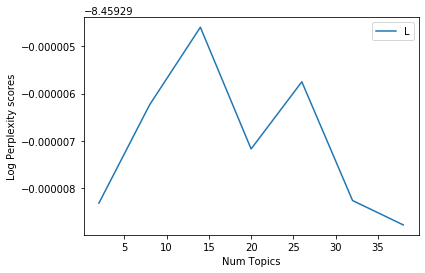

In [78]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

## 시각화 (분류가 겹치는지 안 겹치는지 확인하기)

In [41]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

/Users/soothingni/anaconda3/lib/python3.7/site-packages/_pytest/mark/structures.py:378: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [ ]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(prepared_data)

In [175]:
#외부 html 파일로 저장
pyLDAvis.save_html(prepared_data, 'LDAvis.html')

### 토픽 모델링 결과가 마음에 든다면 이 이후로 진행
들지 않는다면 들 때까지 1을 실행

In [ ]:
#분류 결과를 외부 텍스트 파일로 저장
for k in range(NUM_TOPICS):
    TOPIC_NUM = k
    selected_indexes = []
    selected_docs = []
    for i in range(len(docs_filtered)):
        topics_list = lda_model.get_document_topics(corpus[i])
        hi_topic, hi_prob = get_highest_topic(topics_list)
        if hi_topic == TOPIC_NUM:
            selected_docs.append(docs_filtered[i])
            selected_indexes.append(i)
    file_name = CATEGORY.replace('/', '') +'_TOPIC_' + str(TOPIC_NUM) + '.txt'
    with open(data_path, 'r') as f:
        text = f.readlines()
        with open('/Users/soothingni/Downloads/' + file_name, 'a') as f1:
            for k in selected_indexes:
                f1.write(text[k] + '\n')

# 2. 의미연결망

### 형성된 외부 .graphml 파일을 Gephi에서 열어서 시각화하기

In [166]:
#선택한 토픽의 인덱스 (인덱스 바꿔가면서 실행해주기: 흥미로운 인덱스 선택하거나 모든 인덱스 번호로)
TOPIC_NUM = 0

#연결망에 표시할 단어의 수
NUM_WORDS = 15

def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words        

selected_docs = []
selected_indexes = []
for k in range(len(docs_filtered)):
    topics_list = lda_model.get_document_topics(corpus[k])
    hi_topic, hi_prob = get_highest_topic(topics_list)
    if hi_topic == TOPIC_NUM:
        selected_docs.append(docs_filtered[k])
        selected_indexes.append(k)
        
topic_nouns = []
for x in selected_docs:
    topic_nouns.extend(x)

In [ ]:
#토픽별 글 수와 전체에서 차지하는 비율
num_of_articles = len(selected_docs)
print('이 토픽에 속한 글 수 %d개'%num_of_articles)
print('전체 글 수에서 차지하는 비율 %d퍼센트'%(num_of_articles/len(docs_filtered)*100))

In [ ]:
from collections import Counter
c = Counter(topic_nouns)
selected_words = get_words(c.most_common(NUM_WORDS))

from kr_sna1 import do_kr_sna
g = do_kr_sna(selected_docs, selected_words)

import networkx as nx
nx.write_graphml(g, 'TOPIC_' + str(TOPIC_NUM) + '.graphml')

# 3. 워드클라우드

In [135]:
import numpy as np
from PIL import Image
from collections import Counter
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

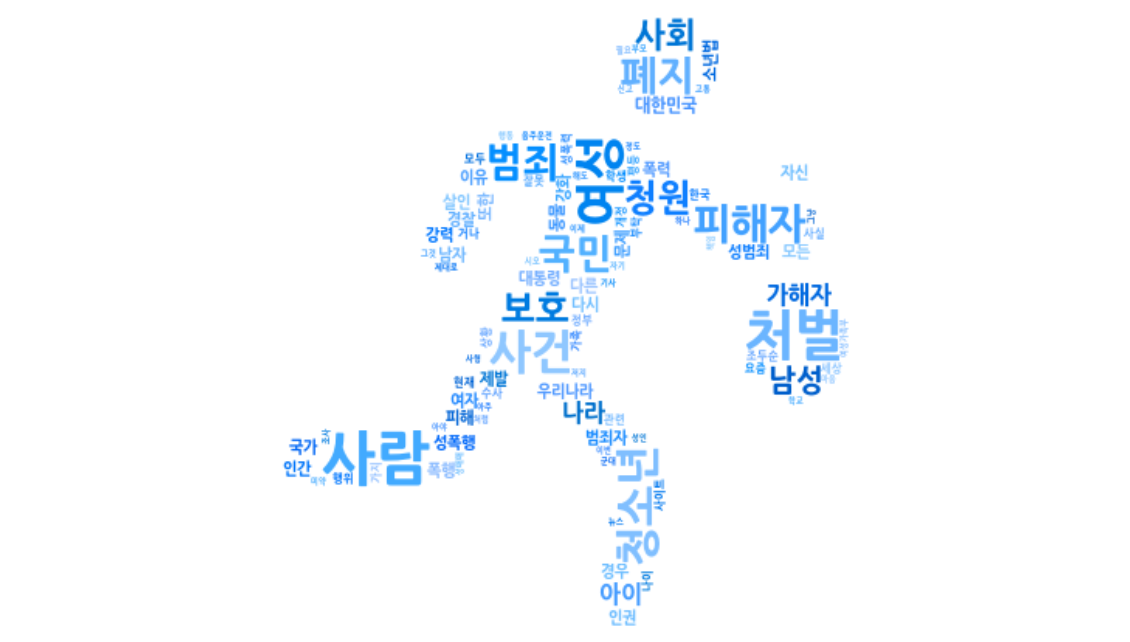

In [168]:
#워드클라우드 모양이 될 외부 png 파일 불러오기
mask = np.array(Image.open('/Users/soothingni/Documents/python_data/week3/사건사고/슬라이드1.png')) #png 경로 지정

#컬러 커스터마이징
color_value = [207, 215, 212, 210]
def new_color_func(word, font_size, position,
                   orientation, random_state=None, **kwargs):
    return "hsl(%d,100%%,%d%%)" % (color_value[random.randint(0, 3)],random.randint(40, 80))

#워드클라우드 그리기 (실행할 때마다 구성 조금씩 달라짐)
path = '/Users/soothingni/Downloads/NanumGothicExtraBold.otf' #한글 폰트 경로 지정하기
wordcloud = WordCloud(font_path=path, max_font_size=80, background_color='white', max_words= 100, mask = mask)
wc = wordcloud.generate_from_frequencies(c)
fig = plt.figure(figsize = (20,20))
plt.imshow(wc.recolor(color_func=new_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()

In [169]:
#워드클라우드를 외부 png로 저장 (마음에 드는 결과가 나왔을 때)
png_name = 'TOPIC_' + str(TOPIC_NUM) + '.png'

wc.to_file(png_name)